<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/TfBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip3 install --upgrade tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt 

In [0]:
print(tf.__version__)

1.14.0


In [0]:
x = tf.Variable(8)
f = x*x


1.tf.Variable() used to declare a variable which is not initialised until the init() func is called

2.f = x*x denotes a computational graph and not a mathematical calc 

3.f is a tensor object 

In [0]:
myrand = tf.random_normal((3,3),mean = 0, stddev = 1.0)
sess = tf.InteractiveSession()

print(myrand.eval())

[[-0.28887802 -1.0129563  -1.2101105 ]
 [ 1.2334859   0.4351745   0.03901125]
 [ 1.6087698   2.0962787  -1.1218095 ]]


In [0]:
##2 methods of initialisation :: ##global initialisation vs individual initialisation as session is responsible for the actual computation within the block (Since Session is a block of execution it comes as Session()) 
##All of these are methods as they create instances of these classes when invoked 


#INDIVIDUAL with session not defined as default

sess = tf.Session()
sess.run(x.initializer)
sess.run(f)
sess.close()

#INDIVIDUAL with session defined as default 
with tf.Session() as sess:
  x.initializer.run()
  print(f.eval())

#GLOBAL init
init = tf.global_variables_initializer()

with tf.Session() as sess:
  init.run()
  print(f.eval())

# with tf.Session as sess:
#   x.initializer.run()


64
64


Phase of making graphs - computation phase 
Phase of testing graphs - execution phase 

In [0]:
sess = tf.Session()
sess.run(x.initializer)

## shows that this is not a 
print(f)
print(f.eval(session = sess))

Tensor("mul:0", shape=(), dtype=int32)
64


In [0]:
##Variables can be shared across all graphs 
##Node values on the other hand will be cleared once the graph execution is complete 

w = tf.constant(64)
n = w+x
print(w)
init = tf.global_variables_initializer()

with tf.Session() as sess:
  init.run()
  print(w) 
  print(w.eval())
  
print(w)



Tensor("Const_12:0", shape=(), dtype=int32)
Tensor("Const_12:0", shape=(), dtype=int32)
64
Tensor("Const_12:0", shape=(), dtype=int32)


In [0]:
## Computing multiple values in a graph simulateneously 

a = tf.Variable(5)
b = tf.Variable(10)
d = b + tf.constant(5)
c = a+d

init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  print(c.eval())

20


In [0]:
## Input and output are multidimensional arrays in tf and hence they are called tensor . 
## At the core, tensors are np ndarrays that usually contain floats. They may include strings as well (byte arrays )
## nodes are the blocks that are created when some association is implied : so matmul creates a node rather than actually computing the matmul UNTIL the session is run and all the nodes are evaluated 
## tf automatically runs your card on the GPU if you have it (np wont)
## tf.Variable/constant({value}, dtype, name ** Important so that it can be called )


AUTODIFF (Chain Rule)

1. 4 main approaches : most common reverse mode autodiff ;  
others include :: forward mode, symbolic, numerical 
2. can be employed using the gradient method :: gradient(operation, var) ;

  #theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta") 
  here operation can be say MSE : the op that has to be applied on the variable;
  var is the variable who gradient is to be computed after the op has been applied to it 
  

Mini Batches : 

Created with placeholder - replace value at runtime ;

Need to specify the output tensor's datatype 



In [0]:
## Random_normal 
l = []
init = tf.global_variables_initializer()

t = tf.random_normal([1,100])

with tf.Session() as sess:
  sess.run(init)
  l = t.eval()
  
  
                

[-0.66186905 -0.36842868  1.7969819   0.8898488  -1.941692   -0.26661238
  0.09392562  0.13334058  0.7129527  -0.46765906 -0.09407325 -0.4169778
 -0.04700751 -0.31740823 -1.2724003  -0.4153373  -0.07965001  0.63540465
 -0.10852363 -0.5161696  -1.0013121   1.0911027  -1.1877058   0.6575167
 -0.90276265 -0.80658203 -0.14455307 -1.1369829  -2.4406366  -0.22439957
  1.0140579  -1.6078237   0.0235752   1.5089618   0.3141112  -1.4568931
  0.6362899  -0.03927839 -0.23278816  0.77806234  2.7652216  -0.6485174
 -1.0365577  -0.69281906  0.09204502 -0.6861984  -0.6965619   0.77402526
  0.2668729  -1.6083474  -0.15906017 -0.17159715  0.99036294  0.86607057
 -1.0252826  -1.362303   -1.4085763   0.01347194  0.62930506 -1.1510253
  0.9694589  -1.1837059  -0.37654117 -0.3818948   1.0363026   0.8643735
  0.25249472  0.31292668  1.1423922  -0.7472086  -1.5771618  -0.6332163
 -2.620354   -2.7169008   0.5179602  -0.8980784  -0.04378334  1.516151
  0.45601234 -0.78334284 -0.18875793  1.3821107   0.44143674

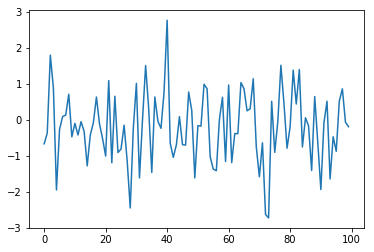

In [0]:
print(l[0])
print(len(l[0]))
plt.plot(l[0])